# Représentation temps-fréquence

In [2]:
from myst_nb import glue
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Les transformations de Fourier font ressortir le contenu fréquentiel
mais elles ne permettent pas facilement de localiser temporellement certains évènements qui surviennent dans le signal,
comme des changements brusques ou des modifications de fréquence.

La {numref}`F:temps-frequence:deux-sinus` représente deux signaux et leur spectres respectifs.
Ces deux signaux ont en commun le fait qu'ils sont constitués de deux sinusoïdes de fréquence 50 Hz et 200 Hz,
la différence étant l'ordre d'apparition des sinusoïdes.
À partir des spectres seuls, il n'est pas possible de comprendre clairement ce que sont les signaux temporels :
d'après le module, on comprend que les signaux temporels sont constitués de deux sinusoïdes de 50 Hz et 200 Hz,
mais la phase n'est pas interprétable.

```{glue:figure} G:temps-frequence:deux-sinus
:name: "F:temps-frequence:deux-sinus"

Spectres de deux signaux constitués de sinusoïdes de fréquence 50 Hz et 200 Hz.
```

Pour répondre à la difficulté d'analyser les localisations temporelles des fréquences, d'autres outils ont été développés.

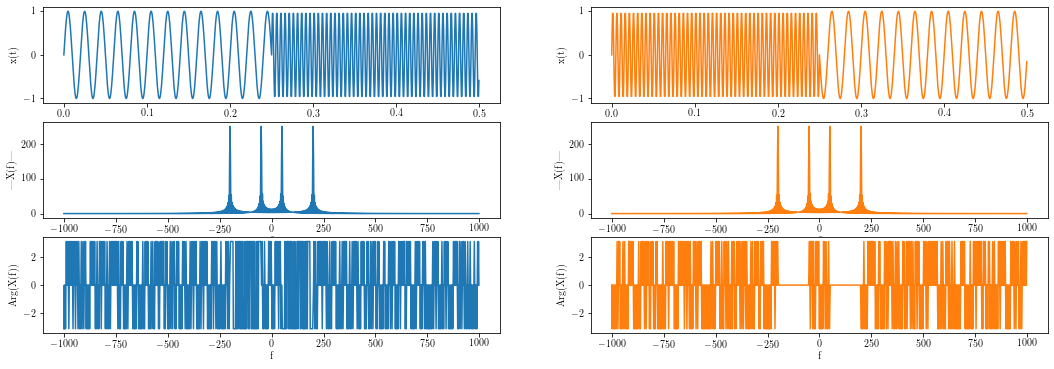

In [3]:
N = 1000
n = np.arange(N)
fe = 2e3
Te = 1/fe
t = n*Te
k = np.arange(N) - N/2
f = k*fe/N
f1, f2 = 50, 200

# Signaux
signals = [
    np.where( n<N/2, np.sin(2*np.pi*f1*t), np.sin(2*np.pi*f2*t) ),
    np.where( n<N/2, np.sin(2*np.pi*f2*t), np.sin(2*np.pi*f1*t) )
]
colors = [ "tab:blue", "tab:orange" ]

i = 0
fig = plt.figure(figsize=(18,6))
for x in signals:
    
    i += 1
    
    # Transformée de Fourier (partie positive seulement)
    X = fft.fftshift(fft.fft(x))
    
    # Affichage
    plt.subplot(3,2,i)
    plt.plot(t, x, colors[i-1])
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.subplot(3,2,2+i)
    plt.plot(f, np.abs(X), colors[i-1])
    plt.xlabel("f")
    plt.ylabel("|X(f)|")
    plt.subplot(3,2,4+i)
    plt.plot(f, np.angle(X), colors[i-1])
    plt.xlabel("f")
    plt.ylabel("Arg(X(f))")

glue("G:temps-frequence:deux-sinus", fig, display=False)

## Transformée de Fourier à court terme

La transformée de Fourier à court terme (STFT : _short-time Fourier transform_)
est une transformée de Fourier restreinte à une portion du signal délimitée par une fenêtre $w(t)$
qu'on fait glisser le long de l'axe temporel :

$$
X(f,\tau) = \int_{-\infty}^{+\infty} x(t) w(t-\tau) e^{-j2\pi f t} dt
$$

Il s'agit simplement de la formule de la transformée de Fourier dans laquelle a été introduite la fenêtre,
qui est positionnée en $\tau$.
La transformée de Fourier à court terme est donc un signal à deux dimensions
qui dépend d'un temps $\tau$ et d'une fréquence $f$, d'où le nom de « représentation temps-fréquence ».
L'objectif de cette transformée étant l'analyse dans le domaine temps-fréquence, et non la reconstruction du signal temporel, 
la transformée inverse n'a pas d'utilité.

Lorsqu'on représente une transformée de Fourier à court terme, on utilise uniquement son module,
et plus précisément le carré du module $|X(f,\tau)|^2$ qui est appelé « spectrogramme » de $x(t)$.
Le spectrogramme fournit une indication sur la quantité d'énergie présente dans le signal
autour de la fréquence $f$ et de l'instant $\tau$.
Les figures représentent les spectrogrammes de quelques signaux.

````{tabbed} Sinus à 50 et 200 Hz
```{glue:figure} G:temps-frequence:sin50200
:figwidth: 800px
```
````

````{tabbed} Sinus à 200 et 50 Hz
```{glue:figure} G:temps-frequence:sin20050
:figwidth: 800px
```
````

````{tabbed} Gaussienne modulée
```{glue:figure} G:temps-frequence:gaussienne
:figwidth: 800px
```
````

````{tabbed} Chirp
```{glue:figure} G:temps-frequence:chirp
:figwidth: 800px
```
````

````{tabbed} Hello
```{glue:figure} G:temps-frequence:hello
:figwidth: 800px
```
````

````{tabbed} Coin coin coin
```{glue:figure} G:temps-frequence:duck
:figwidth: 800px
```
````

```{margin}
Certains artistes s'amusent également avec cette transformée, comme Aphex Twin sur [_Formula_](https://youtu.be/M9xMuPWAZW8?t=305).
```

La représentation en spectrogramme est également intéressante en musique.
Voyez par exemple le résultat sur
[_La Lettre à Élise_](https://www.youtube.com/watch?v=S2XkCfvGPXE) de Ludwig van Beethoven
ou la [_Symphonie du Nouveau Monde_](https://youtu.be/Txp-pHU2K6w?t=652) de Antonín Dvořák.

En traitement du signal, une fenêtre est un signal de durée limitée.
Par conséquent, la majeure partie de l'énergie de la fenêtre $w(t)$ est contenue dans un intervalle temporel.
De même, l'énergie de la fenêtre est également contenue dans un intervalle fréquentiel.
Ces deux intervalles définissent une zone délimitée dans le plan temps-fréquence.
L'idéal serait d'avoir une zone très localisée pour avoir une bonne résolution, à la fois temporelle et fréquentielle.
Or, il est impossible d'avoir une très bonne localisation à la fois en temps et en fréquence,
c'est-à-dire une zone qui se réduit à un point.
Ce phénomène est le principe d'incertitude de Gabor-Heisenberg.
C'est d'ailleurs ce qui explique la propriété de changement d'échelle des transformations de Fourier :
la contraction dans un domaine implique une dilatation dans l'autre domaine.
Les fenêtres qui conduisent à la meilleur location temps-fréquence sont des gaussiennes :
on parle alors d'analyse de Gabor.

La tranformée de Fourier à court terme a l'avantage d'être très simple.
En revanche, elle considère implicitement le signal stationnaire dans la fenêtre d'observation
(c'est-à-dire que durant la durée de la fenêtre, le signal n'est pas censé présenter de grands changements).
Elle s'applique donc aux signaux qui sont lentement stationnaires,
par exemple dans le domaine biomédical, en géophysique ou en traitement de la parole.

Il existe d'autres représentations temps-fréquence, comme la transformée en ondelettes
(utilisée par exemple dans le format de compression JPEG 2000).

```{figure} _static/figs/temps-frequence.png
---
width: 600px
name: F:temps-frequence:temps-frequence
---
Découpage du plan temps-fréquence pour quatre représentations d'un signal.
```

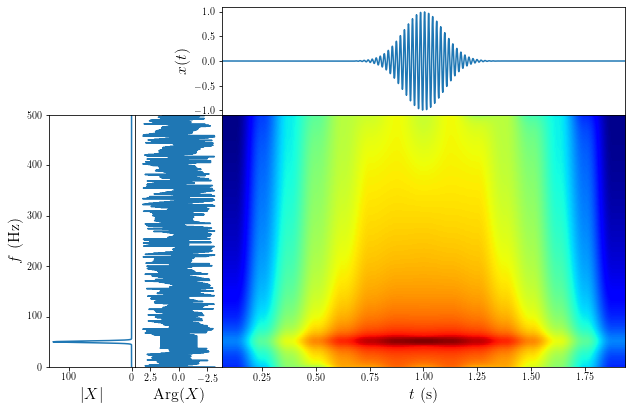

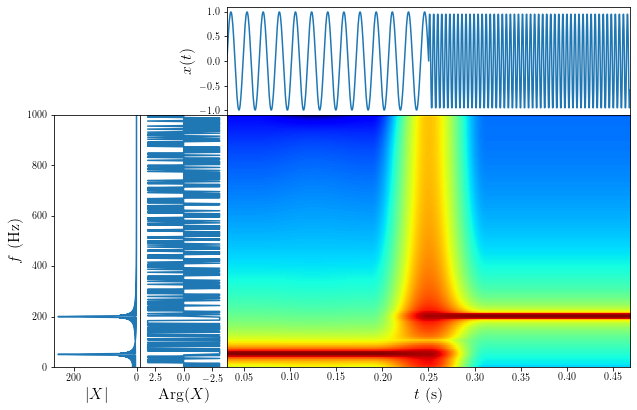

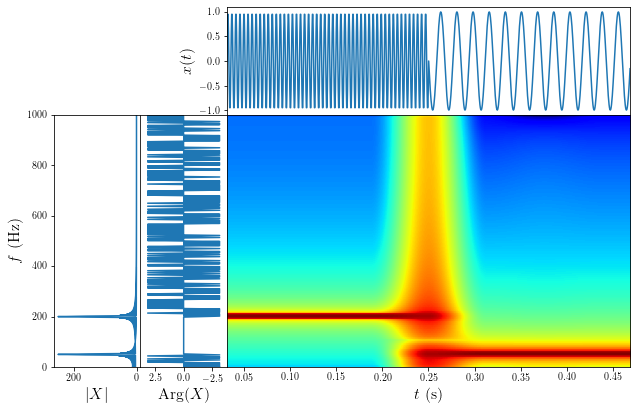

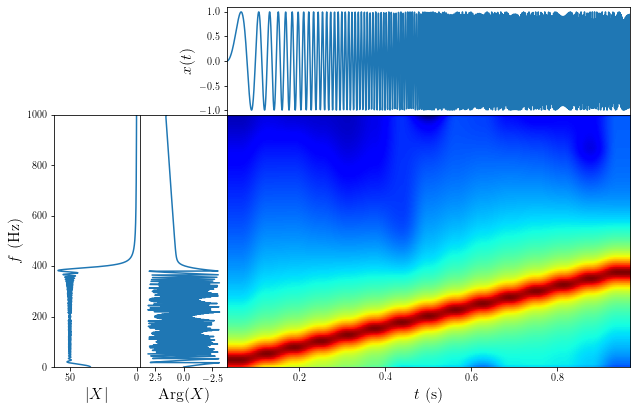

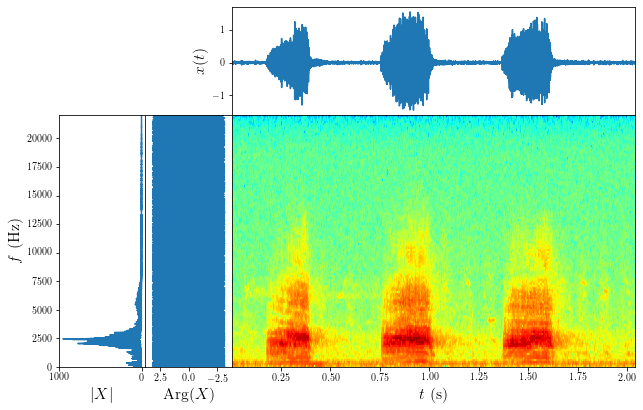

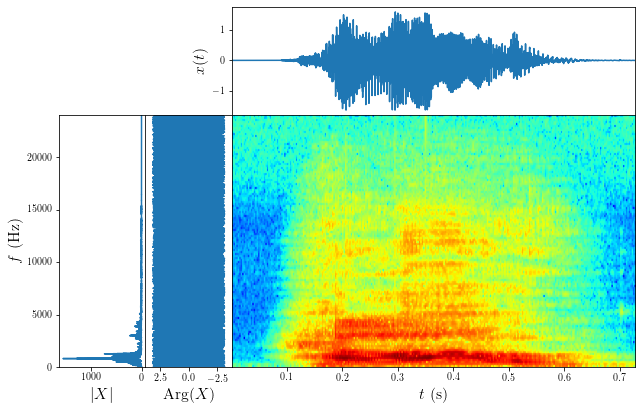

In [10]:
from scipy.io import wavfile
from IPython.display import Audio, Markdown, display

def tfplot(x, fe, name):
    
    N = len(x)
    n = np.arange(N)
    Te = 1/fe
    t = n*Te
    k = np.arange(N/2)
    f = k*fe/N

    
    X = fft.fftshift(fft.fft(x))
    X = X[int(N/2):]

    fig = plt.figure(figsize=(8,5))

    ax1 = plt.subplot(2,3,3)
    ax1.set_position([0.3, 0.7, 0.7, 0.3])
    plt.plot(t, x)
    plt.xlim([t[0], t[-1]])
    plt.ylabel("$x(t)$", fontsize=16)

    ax2 = plt.subplot(2,3,4)
    ax2.set_position([0, 0, 0.15, 0.7])
    plt.plot(np.abs(X), f)
    plt.ylim([0, fe/2])
    ax2.set_xlim(ax2.get_xlim()[::-1])#1.2e3, 0)
    plt.xlabel("$|X|$", fontsize=16)
    plt.ylabel("$f$ (Hz)", fontsize=16)

    ax3 = plt.subplot(2,3,5)
    ax3.set_position([0.15, 0, 0.15, 0.7])
    plt.plot(np.angle(X), f)
    plt.ylim([0, fe/2])
    plt.yticks([])
    ax3.set_xlim(np.pi*1.2, -np.pi*1.2)
    plt.xlabel("$\mathrm{Arg}(X)$", fontsize=16)

    ax4 = plt.subplot(2,3,6)
    ax4.set_position([0.3, 0, 0.7, 0.7])
    Pxx, freqs, bins, im = plt.specgram(x, NFFT=250, Fs=fe, noverlap=125, cmap="jet", scale="dB")
    plt.yticks([])
    plt.xlabel("$t$ (s)", fontsize=16)

    glue("G:temps-frequence:" + name, fig, display=False)
    
    
N = 2000
n = np.arange(N)
fe = 1e3
Te = 1/fe
t = n*Te;

# Gaussienne
x = np.exp(-(n-N/2)**2/2/10000) * np.sin(2*np.pi*50*t)
tfplot(x, fe, "gaussienne")
        
# Sinus 50-200
fe = 2e3
x = signals[0]
tfplot(x, fe, "sin50200")
            
# Sinus 200-50
fe = 2e3
x = signals[1]
tfplot(x, fe, "sin20050")

# Chirp
f0 = 0
f1 = 100
k = (f1-f0)/t[-1]
x = np.sin( 2*np.pi*f0*t + 2*np.pi*k*t**2 )
tfplot(x, fe, "chirp")

# Signal audio "duck"
fe, x = wavfile.read("_static/files/duck.wav")
x = x/20000
x = x[10000:100000,1]
tfplot(x, fe, "duck")

# Signal audio "hello"
fe, x = wavfile.read("_static/files/hello.wav")
x = x/20000
tfplot(x, fe, "hello")